In [1]:
# environment set up
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import pandas as pd
import time
import ast
from scipy import stats as st

In [2]:
spectrum_len = 500 # automate this

parent_dir = os.environ['PWD']
data_dir = os.environ['DATA_DIR']
stddata_path = os.path.join(data_dir, "StdData-" + str(spectrum_len))

os.chdir(os.path.join(parent_dir, "lab-notebook", "smunukutla"))

In [3]:
data = pd.read_csv("data.csv", sep=",")
record_nums = data.iloc[0, :].tolist()
spectrum_names = data.iloc[1, :].tolist()
y = data.iloc[2, :].astype(int).tolist()
y = np.reshape(y, (len(y), 1))
num_samples = len(y)

In [4]:
num_samples

166

In [5]:
data

,0,1,2,3,4,5,6,7,8,9,...,156,157,158,159,160,161,162,163,164,165
0,00108,00114,00120,00124,00130,00142,00148,00154,00158,00177,...,10896,10917,10938,10946,10967,10988,11009,11030,11051,11072
1,Actinolite,Actinolite,Actinolite,Actinolite,Actinolite,Actinolite,Actinolite,Actinolite,Actinolite,Actinolite,...,Topaz,Topaz,Topaz,Topaz,Topaz,Topaz,Topaz,Topaz,Topaz,Topaz
2,4,4,4,4,4,4,4,4,4,4,...,0,0,0,0,0,0,0,0,0,0


In [6]:
spectra = np.zeros((num_samples,spectrum_len))
wavelengths = np.zeros((1,spectrum_len))

In [7]:
for i in range(len(record_nums)):
    data = pd.read_csv(os.path.join(stddata_path,"{}.csv".format(record_nums[i])))
    if i == 0:
        wavelengths[i,:] = data.iloc[:, 0].to_numpy()
    spectra[i,:] = data.iloc[:, 1].to_numpy()

In [8]:
type(spectra)

numpy.ndarray

In [9]:
y_cat = to_categorical(y)

In [10]:
data.head(5)

,wavelength,reflectance
0,0.370000,0.878464
1,0.374269,0.878143
2,0.378537,0.875394
3,0.382806,0.877019
4,0.387074,0.878757


In [11]:
spectra.shape

(166, 500)

In [12]:
spectra

array([[0.36625177, 0.37408954, 0.38041823, ..., 0.69747148, 0.69613203,
        0.69590056],
       [0.22933248, 0.23542408, 0.24072858, ..., 0.57995432, 0.57845447,
        0.58057582],
       [0.10552621, 0.10864627, 0.11163579, ..., 0.3127732 , 0.31293405,
        0.31438494],
       ...,
       [0.84827669, 0.8483359 , 0.84993451, ..., 0.73254605, 0.72484708,
        0.71382553],
       [0.88008486, 0.88482508, 0.88539167, ..., 0.75476558, 0.74785095,
        0.7386977 ],
       [0.87846376, 0.87814294, 0.87539409, ..., 0.7541015 , 0.74652251,
        0.73594507]])

In [13]:
y_cat = to_categorical(y)

In [14]:
from sklearn.decomposition import DictionaryLearning

In [15]:
model = DictionaryLearning(n_components=10, alpha=1, verbose=True)

In [16]:
dictionary = model.fit_transform(spectra)

[dict_learning] .+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+


In [17]:
dictionary.shape

(166, 10)

In [18]:
print(dictionary)

[[-1.17972858e+01  2.32653972e-01 -2.61306235e+00 ... -1.65366914e+00
   4.01819996e-01 -3.12213300e-03]
 [-7.30556247e+00  1.56569823e-01 -6.45040608e+00 ... -2.01498604e+00
   4.79701860e-01  1.10294345e-03]
 [ 7.11276814e-02  3.64037155e-01 -8.01376695e+00 ... -6.28618076e-01
  -2.43643389e-02  3.80093780e-03]
 ...
 [-1.29411757e+01 -7.57209280e-01 -1.04831010e+00 ...  1.01923669e+01
  -2.04610621e-01 -4.42801050e-03]
 [-1.35099133e+01 -1.03432893e+00 -1.11055141e+00 ...  9.80639208e+00
  -7.76227790e-01  2.76397240e-03]
 [-1.32591294e+01 -5.80552315e-01  2.26767156e-01 ...  9.79048736e+00
   1.22286294e-01 -1.27412074e-03]]


In [19]:
model2 = DictionaryLearning(n_components=10, alpha=1, transform_algorithm='threshold', verbose=True)

In [20]:
dictionary2 = model2.fit_transform(spectra)

[dict_learning] .+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+.+


In [21]:
dictionary2.shape

(166, 10)

In [22]:
print(dictionary2)

[[-13.96702235  11.76187847 -13.5262892  ...  13.69659925  12.32970097
    0.        ]
 [-12.00684005   9.64230327 -12.25027701 ...  11.72398555  11.13384119
    0.        ]
 [ -6.9408455    5.19291353  -7.63619502 ...   6.77768826   6.81191958
    0.        ]
 ...
 [-19.67534109  17.7134846  -18.04453112 ...  19.60979497  16.09787098
    0.        ]
 [-19.71066981  17.72580689 -18.03078169 ...  19.63619482  16.14339974
    0.        ]
 [-20.3672688   18.42861286 -18.60715792 ...  20.31026363  16.59028884
    0.        ]]


In [23]:
model.get_params()

{'alpha': 1,
 'code_init': None,
 'dict_init': None,
 'fit_algorithm': 'lars',
 'max_iter': 1000,
 'n_components': 10,
 'n_jobs': None,
 'positive_code': False,
 'positive_dict': False,
 'random_state': None,
 'split_sign': False,
 'tol': 1e-08,
 'transform_algorithm': 'omp',
 'transform_alpha': None,
 'transform_n_nonzero_coefs': None,
 'verbose': True}

In [24]:
atoms = model.components_
print(atoms)

[[-0.03576344 -0.03586424 -0.03608334 ... -0.04367278 -0.04356272
  -0.04343269]
 [ 0.02333185  0.02426826  0.02531973 ...  0.0048098   0.0045162
   0.00414729]
 [-0.01466709 -0.01506379 -0.01531206 ... -0.03734992 -0.03729115
  -0.03741644]
 ...
 [ 0.04298044  0.0432337   0.04325401 ...  0.02180551  0.02105525
   0.02026596]
 [ 0.00781883  0.00835778  0.00902266 ...  0.06802284  0.06813333
   0.06787213]
 [ 0.02854764  0.04207926  0.00236378 ...  0.00237552 -0.02070313
   0.07813725]]


In [25]:
atoms.shape

(10, 500)

In [26]:
atoms2 = model2.components_
print(atoms2)

[[-0.03576344 -0.03586424 -0.03608334 ... -0.04367278 -0.04356272
  -0.04343269]
 [ 0.02333185  0.02426826  0.02531973 ...  0.0048098   0.0045162
   0.00414729]
 [-0.01466709 -0.01506379 -0.01531206 ... -0.03734992 -0.03729115
  -0.03741644]
 ...
 [ 0.04298044  0.0432337   0.04325401 ...  0.02180551  0.02105525
   0.02026596]
 [ 0.00781883  0.00835778  0.00902266 ...  0.06802284  0.06813333
   0.06787213]
 [ 0.03870863 -0.07287656  0.0307702  ...  0.0176361   0.01276883
   0.00425772]]


In [27]:
atoms2.shape

(10, 500)

approximate with the training data
run transform on the training data to find the reconstructed spectra

166 x 10 X 10 x 500

approximation of an integral

thresholding is bad to get coefficients

use max distance

take each row at a time and then take the norm of each

L2 norm / number of points

model.transform(spectra) is the same thing as dictionary

In [28]:
reconstructed_spectra = dictionary.dot(atoms)

In [29]:
reconstructed_spectra

array([[0.40523206, 0.40754267, 0.41139942, ..., 0.69998509, 0.69953317,
        0.69921013],
       [0.27112114, 0.27413197, 0.27750169, ..., 0.60424031, 0.60435808,
        0.60584118],
       [0.11443747, 0.11829083, 0.12078126, ..., 0.32311554, 0.322655  ,
        0.32450748],
       ...,
       [0.83112329, 0.83248168, 0.83299407, ..., 0.7275824 , 0.71805673,
        0.70752366],
       [0.851733  , 0.85331353, 0.85368921, ..., 0.74412185, 0.73480024,
        0.7254537 ],
       [0.84614214, 0.84838965, 0.85000079, ..., 0.75222617, 0.74337688,
        0.73368136]])

In [30]:
reconstructed_spectra.shape

(166, 500)

In [31]:
distances = []
for i in range(len(spectra)):
    distances.append(np.linalg.norm(spectra[i] - reconstructed_spectra[i]))

In [32]:
distances

[0.18251599845790653,
 0.2330636956050255,
 0.17807659870224232,
 0.1467140178953102,
 0.1377972872607136,
 0.2022449617510483,
 0.17782783799885502,
 0.1158653155217745,
 0.0883139679563291,
 0.1963731724221259,
 0.2203058436827576,
 0.316757266147645,
 0.29495225032404115,
 0.1938656045999079,
 0.20438479160638573,
 0.30969730128171413,
 0.12285461945927834,
 0.16871246504757503,
 0.18564152668288175,
 0.2871864226461473,
 0.38155221544582063,
 0.11245812707823362,
 0.1313864818551417,
 0.17771283306392974,
 0.13483608008966738,
 0.30290485211903956,
 0.71543160615505,
 0.09393289593335562,
 0.3131800662054786,
 0.3403336312382364,
 0.3198190973985441,
 0.38325362952567626,
 0.24354782598466554,
 0.6043946710377138,
 0.48442209471717246,
 0.7650234427264525,
 0.30983911465270275,
 0.36278245024201233,
 0.4066081394679665,
 0.22126975711426097,
 0.14263373833106752,
 0.173926383631123,
 0.4603901096883237,
 0.3252291380171495,
 0.5412832987457205,
 0.6707831337622182,
 0.1281701743606

In [33]:
reconstructed_spectra2 = dictionary2.dot(atoms2)

In [34]:
reconstructed_spectra2

array([[2.67261777, 2.7299975 , 2.7863416 , ..., 4.70162257, 4.69509713,
        4.68618657],
       [2.31693659, 2.36688352, 2.41585257, ..., 4.1539825 , 4.1486694 ,
        4.14132728],
       [1.35981367, 1.38927471, 1.41806453, ..., 2.49125125, 2.48838883,
        2.48442976],
       ...,
       [3.74959707, 3.82967386, 3.90835647, ..., 6.40276313, 6.39276639,
        6.37955366],
       [3.75392496, 3.83408458, 3.91285561, ..., 6.40919942, 6.3991897 ,
        6.38593867],
       [3.88067573, 3.96354308, 4.04497834, ..., 6.61446531, 6.60407175,
        6.5903518 ]])

In [35]:
distances2 = []
for i in range(len(spectra)):
    distances2.append(np.linalg.norm(spectra[i] - reconstructed_spectra2[i]))

In [36]:
distances2

[99.49666756146343,
 86.99262510524409,
 51.25454028277165,
 55.41428389486647,
 35.72592591820713,
 91.98585435446587,
 80.08006575331814,
 49.97989271540942,
 50.84736167617027,
 33.00295128641088,
 118.66948307329085,
 114.39069689424743,
 58.05390903664985,
 65.96289280280934,
 34.46877230553125,
 92.12856039674801,
 128.56157180976996,
 128.4955347163163,
 131.65847647314695,
 120.00535671897136,
 95.30120247462867,
 100.95776331753012,
 125.8263958219589,
 128.43814836131588,
 113.42391968435072,
 102.23761942035404,
 67.78339062535741,
 134.61024905671542,
 130.60680568907947,
 127.06183109061244,
 109.38697166197522,
 104.28182216459749,
 127.09671431771335,
 110.0428039214936,
 106.85595386110786,
 110.35385058396756,
 93.68287445851918,
 114.11043682490562,
 121.89926391102267,
 74.47579908590751,
 70.97667550050983,
 74.03616143983946,
 52.26764612727497,
 52.0729753692257,
 98.06451831285023,
 113.11906330920544,
 104.35308121727773,
 89.10403762885338,
 60.82517201503012,


In [37]:
reconstructed_spectra

array([[0.40523206, 0.40754267, 0.41139942, ..., 0.69998509, 0.69953317,
        0.69921013],
       [0.27112114, 0.27413197, 0.27750169, ..., 0.60424031, 0.60435808,
        0.60584118],
       [0.11443747, 0.11829083, 0.12078126, ..., 0.32311554, 0.322655  ,
        0.32450748],
       ...,
       [0.83112329, 0.83248168, 0.83299407, ..., 0.7275824 , 0.71805673,
        0.70752366],
       [0.851733  , 0.85331353, 0.85368921, ..., 0.74412185, 0.73480024,
        0.7254537 ],
       [0.84614214, 0.84838965, 0.85000079, ..., 0.75222617, 0.74337688,
        0.73368136]])

In [38]:
spectra

array([[0.36625177, 0.37408954, 0.38041823, ..., 0.69747148, 0.69613203,
        0.69590056],
       [0.22933248, 0.23542408, 0.24072858, ..., 0.57995432, 0.57845447,
        0.58057582],
       [0.10552621, 0.10864627, 0.11163579, ..., 0.3127732 , 0.31293405,
        0.31438494],
       ...,
       [0.84827669, 0.8483359 , 0.84993451, ..., 0.73254605, 0.72484708,
        0.71382553],
       [0.88008486, 0.88482508, 0.88539167, ..., 0.75476558, 0.74785095,
        0.7386977 ],
       [0.87846376, 0.87814294, 0.87539409, ..., 0.7541015 , 0.74652251,
        0.73594507]])

Reconstructed Spectra: 35


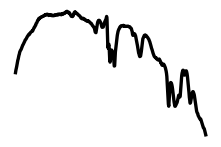

Reconstructed Spectra: 49


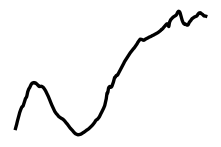

Reconstructed Spectra: 137


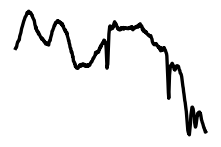

Reconstructed Spectra: 127


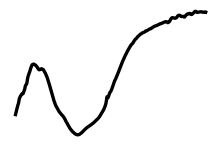

Reconstructed Spectra: 108


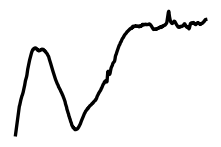

Reconstructed Spectra: 40


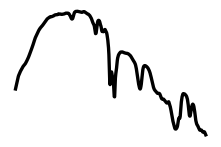

Reconstructed Spectra: 72


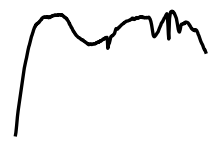

Reconstructed Spectra: 33


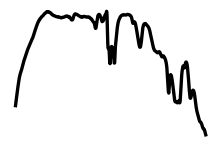

Reconstructed Spectra: 29


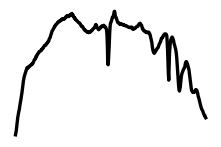

Reconstructed Spectra: 64


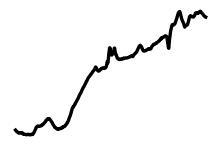

Reconstructed Spectra: 127


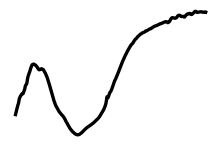

Reconstructed Spectra: 11


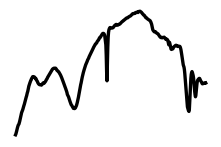

Reconstructed Spectra: 98


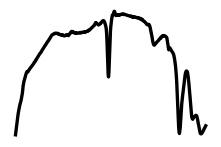

Reconstructed Spectra: 86


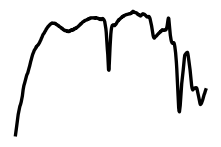

Reconstructed Spectra: 8


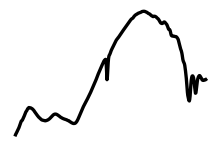

Reconstructed Spectra: 74


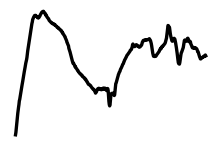

Reconstructed Spectra: 85


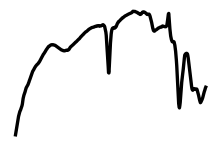

Reconstructed Spectra: 55


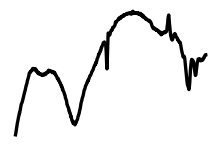

Reconstructed Spectra: 17


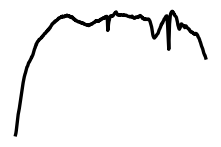

Reconstructed Spectra: 61


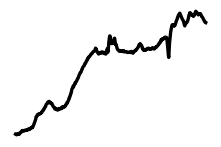

In [39]:
height = 3
width = 1.5*height
linewidth = 4
# for i in range(num_samples):
examples = 20
lst = [35, 49, 137, 127, 108, 40, 72, 33, 29, 64, 127, 11, 98, 86, 8, 74, 85, 55, 17, 61]
for index in lst:
    fig = plt.figure(figsize=(width, height), dpi=60)
    plt.plot(wavelengths[0,:], reconstructed_spectra[index,:], linewidth = linewidth, color='k')
    plt.xticks([])
    plt.yticks([])
    ax = fig.axes
    ax[0].axis('off')
    print("Reconstructed Spectra:", index)
    plt.show()
# path = os.path.join(data_dir, "plots-" + str(spectrum_len), record_nums[i] + "-" + spectrum_names[i] + ".png")
# fig.savefig(path, format = "PNG")
# plt.close(fig)

Reconstructed Spectra2: 35


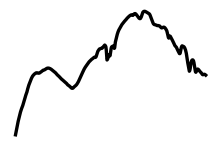

Reconstructed Spectra2: 49


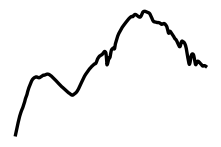

Reconstructed Spectra2: 137


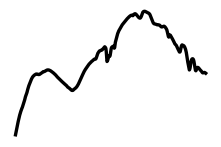

Reconstructed Spectra2: 127


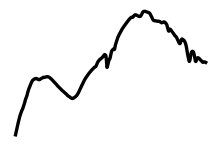

Reconstructed Spectra2: 108


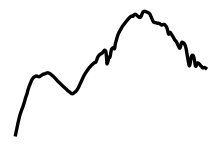

Reconstructed Spectra2: 40


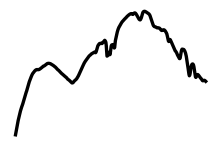

Reconstructed Spectra2: 72


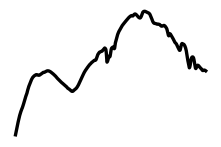

Reconstructed Spectra2: 33


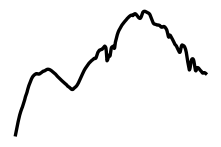

Reconstructed Spectra2: 29


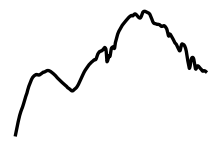

Reconstructed Spectra2: 64


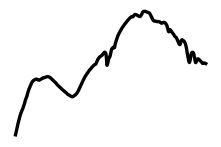

Reconstructed Spectra2: 127


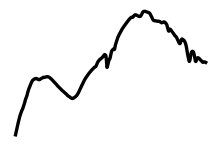

Reconstructed Spectra2: 11


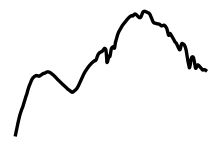

Reconstructed Spectra2: 98


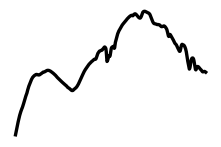

Reconstructed Spectra2: 86


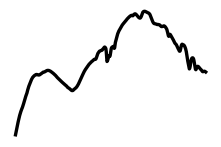

Reconstructed Spectra2: 8


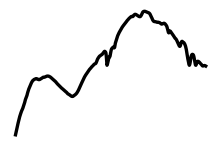

Reconstructed Spectra2: 74


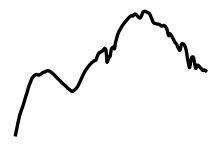

Reconstructed Spectra2: 85


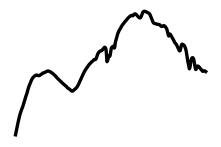

Reconstructed Spectra2: 55


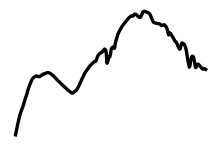

Reconstructed Spectra2: 17


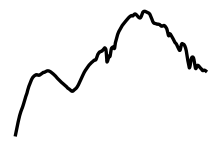

Reconstructed Spectra2: 61


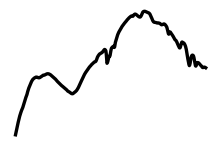

In [40]:
height = 3
width = 1.5*height
linewidth = 4
lst = [35, 49, 137, 127, 108, 40, 72, 33, 29, 64, 127, 11, 98, 86, 8, 74, 85, 55, 17, 61]
for index in lst:
    fig = plt.figure(figsize=(width, height), dpi=60)
    plt.plot(wavelengths[0,:], reconstructed_spectra2[index,:], linewidth = linewidth, color='k')
    plt.xticks([])
    plt.yticks([])
    ax = fig.axes
    ax[0].axis('off')
    print("Reconstructed Spectra2:", index)
    plt.show()

In [45]:
num_zero = 0
for row in atoms:
    done = False
    for col in row:
        if col == 0 and not done:
            num_zero += 1
            done = True
            print(row)
num_zero

0

In [46]:
num_zero = 0
for row in atoms2:
    done = False
    for col in row:
        if col == 0 and not done:
            num_zero += 1
            done = True
            print(row)
num_zero

0

In [47]:
num_zero = 0
for row in dictionary:
    done = False
    for col in row:
        if col == 0 and not done:
            num_zero += 1
            done = True
            print(row)
num_zero

0

In [48]:
num_zero = 0
for row in dictionary2:
    done = False
    for col in row:
        if col == 0 and not done:
            num_zero += 1
            done = True
            print(row)
num_zero

[-13.96702235  11.76187847 -13.5262892   13.4299453   13.93936084
 -13.77098181 -13.66324907  13.69659925  12.32970097   0.        ]
[-12.00684005   9.64230327 -12.25027701  12.03133001  12.10884552
 -12.06533803 -12.14627544  11.72398555  11.13384119   0.        ]
[-6.9408455   5.19291353 -7.63619502  7.27469438  7.12719583 -7.17451773
 -7.44231998  6.77768826  6.81191958  0.        ]
[-7.49903032  5.57120523 -8.2342164   7.89073498  7.68028409 -7.76189786
 -7.99366275  7.29860324  7.41590458  0.        ]
[-4.78867022  3.40083072 -5.54393392  5.16711813  4.99042951 -5.03428566
 -5.34290864  4.68465754  4.85885179  0.        ]
[-12.93582787  10.98228846 -12.49844362  12.3329459   12.91927131
 -12.72649284 -12.70627693  12.73502153  11.27563683   0.        ]
[-11.07766393   8.9093252  -11.26912043  11.05384013  11.16147438
 -11.12814241 -11.20658691  10.82921808  10.21980244   0.        ]
[-6.78192122  5.09466184 -7.43314646  7.0666095   6.9641159  -7.00284617
 -7.24919924  6.6296773   

166